# Lab 3

Functions and ranges

In [1]:
from mpmath import mp

In [2]:
def f1(x): return mp.cos(x)*mp.cosh(x)-1
x1 = [mp.pi*3/2, mp.pi*2]
def f2(x): return 1/x-mp.tan(x)
x2 = [mp.mpf(0), mp.pi/2]
def f3(x): return 2**(-x)+mp.e**x+2*mp.cos(x)-6
x3 = [mp.mpf(1), mp.mpf(3)]

# 1. Bisection

##### Requiers a continuous function and interval (a, b) that fulfills $ f(a)f(b)<=0 $
For a continuous function following statement holds true: $ \forall y\in(f(a), f(b))\,\, \exists x\in(\,a, b)\,: f(x)=y$ $ \implies $ $ \exists x\in(a,b): f(x)=0 $ in our case

In [3]:
def bisect(f, r, prec, err):
    mp.dps=prec
    a=r[0]
    b=r[1]
    try:
        A=f(a)
    except:
        a+=err
        A=f(a)
    try:
        B=f(b)
    except:
        b-=err
        B=f(b)
    assert A*B<=0
    if A==0: return a, A, 0
    if B==0: return b, B, 0
    it=mp.ceil(mp.log((b-a)/err)/mp.log(2))
    cnt=0
    leng=b-a
    m=a+leng/2
    M=f(m)
    while abs(leng)>err and cnt<it: # both statements are equal in this case
        cnt += 1
        leng/=2
        m = a+leng
        M = f(m)
        if M==0: return m, M, cnt
        if mp.sign(M)*mp.sign(A)<0:# signum not to underflow nor overflow
            b=m
            B=M
        else:
            a=m
            A=M
    return m, M, cnt

In [4]:
print(bisect(f1, x1, 15, 1e-7))

(mpf('4.7300407137759519'), mpf('-1.7920119506076304e-6'), 24)


In [5]:
def testbi(f, r):
    x, y, c = bisect(f, r, 50, 1e-7)
    print(f"\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = bisect(f, r, 50, 1e-15)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = bisect(f, r, 50, 1e-33)
    print(f"x={x}\ny={y}\niterations={c}\n\n\n")

In [6]:
testbi(f1, x1)
testbi(f2, x2)
testbi(f3, x3)


x=4.7300407137759520999423000235033047455868171482507
y=-0.0000017920119401830848929701778868802834431469753721587
iterations=24

x=4.7300407448627038796742889969950499964630621242801
y=-0.0000000000000084364080361555027450488128545438322166703572745291
iterations=51

x=4.7300407448627040260240481008338849513259148099913
y=7.576210851985323587082223084674072511794124918112e-33
iterations=111




x=0.86033360079820915576532047078100127318324823021766
y=-0.000000043606024870710021459546712727671670869217332213966
iterations=24

x=0.86033358901937996089029589836246357903842645143713
y=-7.3451394870684062873001110382373052764893438979405e-16
iterations=51

x=0.86033358901937976248389342413766226661673961349168
y=2.4728015282145241248712213871326454879640714289617e-34
iterations=111




x=1.829383552074432373046875
y=-0.0000002044983779175721029939109828989162196010120972086
iterations=25

x=1.8293836019338494125463512318674474954605102539063
y=0.0000000000000024420745617994864393378449719

Ile iteracji aby osiągnąć dokładność rzędu $10^{-7}$, $10^{-15}$ i $10^{-33}$?\
Wystarczy:
* 51 i 111 iteracji, odpowiednio dla dokładności rzędu $10^{-15}$ i $10^{-33}$ dla wszystkich 3 przedziałów
* Aby osiągnąć dokładność rzędu $10^{-7}$, potrzeba 24 iteracje dla przedziałów długości $\frac{\pi}{2}$ (pierwszy i drugi) i 25 iteracji dla długości 2 (trzeci)
* Zgodnie z oczekiwanym wynikiem ze wzoru $n=\Big\lceil\frac{log\frac{b-a}{e}}{log2}\Big\rceil$

Jak obliczyć k pierwszych dodatnich pierwiastków funkcji $f_1(x)$?\
Nie ma jakiegoś prostego sposobu, działającego dla ogólności - jeżeli dowolnym sposobem znaleźliśmy pierwiastek x, który z lewej strony zbiega z tym samym znakiem co jest f(0), to nie możemy mieć pewności że jest to pierwszy pierwiastek, a nie ma jeszcze min 2 innych w tym przedziale. Dodatkowo jeśli będą 3 pierwiastki bardzo blisko siebie, to musielibyśmy "w ciemno" (bez założenia różnych znaków na końcach przedziałów) dzielić przedziały rekurencyjnie.\
Jeżeli mniej więcej znamy wygląd i tym samym położenia pierwiastków (umiemy dostarczyć do funkcji bisect kolejne przedziały o różnych znakach i w których znajduje się tylko jeden pierwiastek [lub z innych powodów możemy założyć że natrafimy na pierwszy z nich]) funkcji, to wystarczy prosto przeiterować po kolejnych przedziałach, za lewy koniec możemy uznać poprzedni pierwiastek + dowolny epsilon, który nam zagwarantuje, że funkcja się nie wyzeruje na samym starcie.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

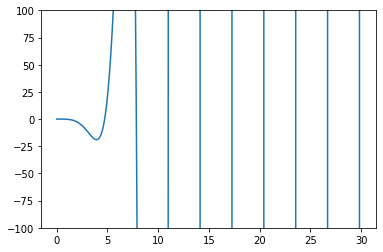

In [8]:
tmp = lambda x: np.cos(x)*np.cosh(x)-1
plt.plot(np.linspace(0, 30, 1000), tmp(np.linspace(0, 30, 1000)))
plt.ylim(-100, 100)
plt.show()

Jak widać na wykresie pierwiestki funkcji $f_1$ są dosyć gęsto, więć krok nie może być za duży, ale na tyle rzadko że skok długości 1 nie obejmie nam dwóch na raz.

In [9]:
def firstk(f, k, prec, err):
    left=mp.mpf(1)/1000
    right=mp.mpf(1)
    res=[]
    L=mp.sign(f(left))
    for i in range(k+1):
        while L*mp.sign(f(right))>0:
            right+=1
        x,_,_ = bisect(f, [left, right], prec, err)
        left=x+0.5
        L=mp.sign(f(left))
        right=left+1
        res+=[x]
    return res

In [10]:
print(*firstk(f1, 10, 50, 1e-33), sep="\n")

4.7300407448627040260240481008338854996322955823734
7.8532046240958375564770666872540502216065102673447
10.995607838001670906669032519105892281243079076115
14.137165491257464177105917855093330846691371520734
17.27875965739948143809107397576864421675968334212
20.42035224562606109093641118931307996112694750027
23.561944902040455075392016800641498019532607314365
26.703537555508186248419407645758571926898477642225
29.845130209103254267001493279394245691416699508482
32.986722862692819561547196864837562803016929000385
36.128315516282622650359635610779787176021001274221


# 2. Newton's

##### We assume the function f is differentiable $\implies$ f has definite slop at each point and hence a unique tangent line.
Thanks to that assumption we can approximate f near $x_0$ by $l(x)=f'(x_0)(x-x_0)+f(x_0)$, and we approximate the actual root of our main function f by the root of the fuction l.
To simplify, we iterate following the formula $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$

In [11]:
def newton(f, fp, x, itmax, eps):
    cnt=0
    x+=eps
    while cnt<itmax:
        if f(x)==0:
            return x, f(x), cnt
        cnt+=1
        d=f(x)/fp(x)
        x=x-d
        if abs(d)<eps:
            return x, f(x), cnt
    return x, f(x), cnt

In [12]:
def fp1(x): return mp.cos(x)*mp.sinh(x)-mp.sin(x)*mp.cosh(x)
def fp2(x): return -1/x**2-mp.sec(x)**2
def fp3(x): return -mp.log(2)*2**(-x)+mp.e**x-2*mp.sin(x)

In [13]:
print(newton(f1, fp1, x1[0], 30, 1e-7))
print(newton(f1, fp1, x1[1], 30, 1e-7))

(mpf('4.7300407448627131638218844213114841266199262645848554'), mpf('0.00000000000052675311234644203483095846230474775697498593089181398'), 3)
(mpf('4.7300407448627040260240481058600976229330475030939829'), mpf('2.8973865309107579889766642858832737882498068744601838e-25'), 7)


In [14]:
def testne(f, fp, r):
    x, y, c = newton(f, fp, r[0], 30, 1e-7)
    print(f"\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[1], 30, 1e-7)
    print(f"\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 70, 1e-15)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[1], 70, 1e-15)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 150, 1e-33)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[1], 150, 1e-33)
    print(f"x={x}\ny={y}\niterations={c}\n\n\n")

In [15]:
testne(f1, fp1, x1)
testne(f2, fp2, x2)
testne(f3, fp3, x3)


x=4.7300407448627131638218844213114841266199262645849
y=0.00000000000052675311234644203483095846230474775697498593089181
iterations=3


x=4.730040744862704026024048105860097622933047503094
y=2.8973865309107579889766642858832737882498068744602e-25
iterations=7

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=5

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=8

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=6

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=9




x=0.00000019999999999999799094962236518418991511849914566537
y=4999999.9999998502262594408702421712604900377671375
iterations=1


x=3.4256184594817281464777507093192459519081589669899
y=-4.3127077145520809323377170811695650818871691003

Metoda ta znajduje pierwiastek zazwyczaj znacznie szybciej oraz dokładniej niż metoda bisekcji i nie wymaga podania przedziału na końcu którego funkcja przyjmuje wartości o różnych znakach. Dodatkowo umożliwa rozwiązanie układu wielu równań (traktujemy je macierzowo).

Ma natomiast kilka problemów, głównym na pewno jest fakt, że wymaga podania pochodnej funkcji. Znaczna większość pozostałych skupia się na funkcji jaką badamy - jest sporo przypadków, które w pesymistycznym wariancie nie zwrócą nam poprawnego wyniku, nawet przybliżonego (np. jeśli trafimy na miejsce w którym funkcja jest stała, lub jak w naszym przypadku funkcja 2 - dzielimy sporą wartość funkcji przez dużo większą pochodną i wartość ta jest za mała w porównaniu do wprowadzanego $\epsilon$ [nie licząc przypadku z $\epsilon=10^{-33}$]).

###### Porównanie zbieżności

In [16]:
def compBN(f, fp, r):
    x, y, c = bisect(f, r, 50, 1e-7)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 30, 1e-7)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n\n")
    
    x, y, c = bisect(f, r, 50, 1e-15)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 70, 1e-15)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n\n")
    
    x, y, c = bisect(f, r, 50, 1e-33)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 150, 1e-33)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n\n\n")

In [17]:
compBN(f1, fp1, x1)

Bisect:
x=4.7300407137759520999423000235033047455868171482507
y=-0.0000017920119401830848929701778868802834431469753721587
iterations=24

Newton:
x=4.7300407448627131638218844213114841266199262645849
y=0.00000000000052675311234644203483095846230474775697498593089181
iterations=3


Bisect:
x=4.7300407448627038796742889969950499964630621242801
y=-0.0000000000000084364080361555027450488128545438322166703572745291
iterations=51

Newton:
x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=5


Bisect:
x=4.7300407448627040260240481008338849513259148099913
y=7.576210851985323587082223084674072511794124918112e-33
iterations=111

Newton:
x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=6





In [18]:
compBN(f2, fp2, x2)

Bisect:
x=0.86033360079820915576532047078100127318324823021766
y=-0.000000043606024870710021459546712727671670869217332213966
iterations=24

Newton:
x=0.00000019999999999999799094962236518418991511849914566537
y=4999999.9999998502262594408702421712604900377671375
iterations=1


Bisect:
x=0.86033358901937996089029589836246357903842645143713
y=-7.3451394870684062873001110382373052764893438979405e-16
iterations=51

Newton:
x=0.0000000000000020000000000000001554107997533201584766143712019238
y=499999999999999.96114730006166796339991099219518553
iterations=1


Bisect:
x=0.86033358901937976248389342413766226661673961349168
y=2.4728015282145241248712213871326454879640714289617e-34
iterations=111

Newton:
x=0.86033358901937976248389342413766233341188436323765
y=0.0
iterations=116





In [19]:
compBN(f3, fp3, x3)

Bisect:
x=1.829383552074432373046875
y=-0.0000002044983779175721029939109828989162196010120972086
iterations=25

Newton:
x=1.8293836019338488174168645158662010479572998017766
y=1.1510923537264340771963062256934372869906305332351e-18
iterations=8


Bisect:
x=1.8293836019338494125463512318674474954605102539063
y=0.0000000000000024420745617994864393378449719380223188354860243789
iterations=51

Newton:
x=1.8293836019338488171362129468141507913601200349677
y=2.7083443613046443665008349381699580015792576737123e-37
iterations=9


Bisect:
x=1.8293836019338488171362129468141510034535686810466
y=8.7017207117816697564041113497366994427287187510743e-34
iterations=111

Newton:
x=1.8293836019338488171362129468141507912940870105911
y=0.0
iterations=10





Jak widać metoda Newtona zazwyczaj zbiega do 0 znacznie lepiej i zazwyczaj wymaga dużo mniej iteracji niż metoda bisekcji, jednak bisekcja zawsze gwarantuje sensowne rozwiązanie, podczas gdy metoda Newtona czasami daje odległe od oczekiwanych wyniki (funkcja 2 i oba przypadki poza $\epsilon=10^{-33}$).

# 3. Secant's

##### Similar to Newton's but doesn't require providing the derviative $\implies$ we approximate the vaule of derivative at point using $f'(x)=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}$


In [20]:
def secant(f, x, itmax, eps):
    cnt=0
    x+=eps
    while cnt<itmax:
        if f(x)==0:
            return x, f(x), cnt
        cnt+=1
        d=f(x)/mp.diff(f, x)
        x=x-d
        if abs(d)<eps:
            return x, f(x), cnt
    return x, f(x), cnt

In [21]:
print(newton(f1, fp1, x1[0], 30, 1e-7))
print(newton(f1, fp1, x1[1], 30, 1e-7))

(mpf('4.7300407448627131638218844213114841266199262645848554'), mpf('0.00000000000052675311234644203483095846230474775697498593089181398'), 3)
(mpf('4.7300407448627040260240481058600976229330475030939829'), mpf('2.8973865309107579889766642858832737882498068744601838e-25'), 7)


In [22]:
def testne(f, r):
    x, y, c = secant(f, r[0], 30, 1e-7)
    print(f"\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[1], 30, 1e-7)
    print(f"\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[0], 70, 1e-15)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[1], 70, 1e-15)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[0], 150, 1e-33)
    print(f"x={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[1], 150, 1e-33)
    print(f"x={x}\ny={y}\niterations={c}\n\n\n")

In [23]:
testne(f1, x1)
testne(f2, x2)
testne(f3, x3)


x=4.7300407448627131638218844213114841266199262645849
y=0.00000000000052675311234644203483095846230474775697498593089181
iterations=3


x=4.730040744862704026024048105860097622933047503094
y=2.8973865309107579889766642858832737882498068744602e-25
iterations=7

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=5

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=8

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=6

x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=9




x=0.00000019999999999999799094962236518418991511849914566537
y=4999999.9999998502262594408702421712604900377671375
iterations=1


x=3.4256184594817281464777507093192459519081589669899
y=-4.3127077145520809323377170811695650818871691003

Metoda siecznych działa bardzo podobnie jak metoda Newtona, więc ma podobne wady i zalety. Jedyną różnicą jest to, że nie musimy dostarczyć funkcji pochodnej, funkcji badanej, tylko wyliczamy przybliżoną wartość pochodnej w punkcie (w związku z czym wystarczy, że nasza funkcja jest różniczkowalna w pukntach badanych - oznacza to że w miarę bezpiecznie można badać funkcje nie mające pochodnej w skończonej [i stosunkowo małej] liczbie punktów).

Zbieżności:

In [24]:
def compBNS(f, fp, r):
    x, y, c = bisect(f, r, 50, 1e-7)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 30, 1e-7)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[0], 30, 1e-7)
    print(f"Secant:\nx={x}\ny={y}\niterations={c}\n\n")
    
    x, y, c = bisect(f, r, 50, 1e-15)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 70, 1e-15)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n\n")
    x, y, c = secant(f, r[0], 70, 1e-15)
    print(f"Secant:\nx={x}\ny={y}\niterations={c}\n\n")
    
    x, y, c = bisect(f, r, 50, 1e-33)
    print(f"Bisect:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = newton(f, fp, r[0], 150, 1e-33)
    print(f"Newton:\nx={x}\ny={y}\niterations={c}\n")
    x, y, c = secant(f, r[0], 150, 1e-33)
    print(f"Secant:\nx={x}\ny={y}\niterations={c}\n\n\n")

In [25]:
compBNS(f1, fp1, x1)

Bisect:
x=4.7300407137759520999423000235033047455868171482507
y=-0.0000017920119401830848929701778868802834431469753721587
iterations=24

Newton:
x=4.7300407448627131638218844213114841266199262645849
y=0.00000000000052675311234644203483095846230474775697498593089181
iterations=3

Secant:
x=4.7300407448627131638218844213114841266199262645849
y=0.00000000000052675311234644203483095846230474775697498593089181
iterations=3


Bisect:
x=4.7300407448627038796742889969950499964630621242801
y=-0.0000000000000084364080361555027450488128545438322166703572745291
iterations=51

Newton:
x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=5


Secant:
x=4.7300407448627040260240481008338848198983418007068
y=2.138211768073756516912429173721185503052157504084e-50
iterations=5


Bisect:
x=4.7300407448627040260240481008338849513259148099913
y=7.576210851985323587082223084674072511794124918112e-33
iterations=111

Newton:
x=4.7300407448627

In [26]:
compBNS(f2, fp2, x2)

Bisect:
x=0.86033360079820915576532047078100127318324823021766
y=-0.000000043606024870710021459546712727671670869217332213966
iterations=24

Newton:
x=0.00000019999999999999799094962236518418991511849914566537
y=4999999.9999998502262594408702421712604900377671375
iterations=1

Secant:
x=0.00000019999999999999799094962236518418991511849914566537
y=4999999.9999998502262594408702421712604900377671375
iterations=1


Bisect:
x=0.86033358901937996089029589836246357903842645143713
y=-7.3451394870684062873001110382373052764893438979405e-16
iterations=51

Newton:
x=0.0000000000000020000000000000001554107997533201584766143712019238
y=499999999999999.96114730006166796339991099219518553
iterations=1


Secant:
x=0.0000000000000020000000000000001554107997533201584766143712019238
y=499999999999999.96114730006166796339991099219518553
iterations=1


Bisect:
x=0.86033358901937976248389342413766226661673961349168
y=2.4728015282145241248712213871326454879640714289617e-34
iterations=111

Newton:
x=0.860333

In [27]:
compBNS(f3, fp3, x3)

Bisect:
x=1.829383552074432373046875
y=-0.0000002044983779175721029939109828989162196010120972086
iterations=25

Newton:
x=1.8293836019338488174168645158662010479572998017766
y=1.1510923537264340771963062256934372869906305332351e-18
iterations=8

Secant:
x=1.8293836019338488174168645158662010479572998017766
y=1.1510923537264340771963062256934372869906305332351e-18
iterations=8


Bisect:
x=1.8293836019338494125463512318674474954605102539063
y=0.0000000000000024420745617994864393378449719380223188354860243789
iterations=51

Newton:
x=1.8293836019338488171362129468141507913601200349677
y=2.7083443613046443665008349381699580015792576737123e-37
iterations=9


Secant:
x=1.8293836019338488171362129468141507913601200349677
y=2.7083443613046443665008349381699580015792576737123e-37
iterations=9


Bisect:
x=1.8293836019338488171362129468141510034535686810466
y=8.7017207117816697564041113497366994427287187510743e-34
iterations=111

Newton:
x=1.8293836019338488171362129468141507912940870105911
y=0.

Metoda siecznych zbiega praktycznie tak samo jak metoda Newtona, lecz przez przybliżenie pochodnej jest mniej dokładna, więc dla funkcji 2 już nawet dokładność $\epsilon=10^{-33}$ nie starcza i metoda zwraca zły wynik.\
Dla wszystkich pozostałych zwraca dokładnie te same wyniki w dokładnie tej samej liczbie iteracji jak metoda Newtona. Porównanie do metody bisekcji jest dokładnie takie samo jak dla metody Newtona(poza jedynym przypadkiem wcześniej wymienionym).